#Trabalho prático # 3
##Introdução à Computação Numérica

###Tópico: Interpolação polinomial

---

Nome: Afonso Lustosa Pires Junior

DRE: 122 079 084


---

**Instruções:**

**Preencha o notebook** com seus dados, seus códigos e **rode todos os códigos**

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Data de entrega: 14/junho/2023*

---


## Tarefa #1: Avaliando o polinômio interpolador

Implemente funções em Python para avaliar o polinômio interpolador $p_n(x)$, considerando como dados de entrada o valor de $x$ e duas listas contemdo os valores dos $x_i$ e dos $y_i$ ($i=0,\dots,n$), respectivamente.

a) Use o polinômio interpolador na forma de Lagrange:
$$
p_n(x) = \sum_{i=0}^n y_i \prod_{j=0\\j\neq i}^n \left(\frac{x-x_j}{x_i-x_j}\right).
$$

b) Use o polinômio interpolador na forma de Newton:
$$
p_n(x) = c_0 + c_1(x-x_0)+\cdots+c_n(x-x_0)\cdots(x-x_{n-1}),
$$
em que $$c_i = f[x_0,\dots,x_i], \quad i=0,\dots,n.$$
Observe que o processo de avaliação pode ser simplificado re-escrevendo o polinômio como
$$
  p_n(x) = c_0 + (x-x_0)(c_1+(x-x_1)(\cdots c_{n-1}+c_n(x-x_{n-1})\cdots)).
$$


Usando de exemplo a função y = x², abaixo está a construção da interpolação com os dois métodos.

Valores de entrada = 50 pontos, igualmente espaçados no intervalo [-50,50] 
Interpolação para pontos cujo x = x_i+0.53, sendo x_i os valores originais.


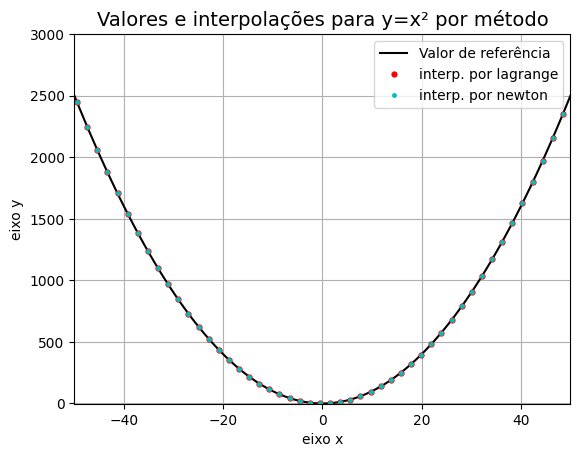

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy
#interpolacao de lagrange
def lagrange_interpolation(valor_x,lista_x,lista_y):
    num_termos = len(lista_x)
    resultado = 0
    for i in range(num_termos): #somatorio
        termo = 1
        for j in range(num_termos):  #produtorio
            if(j!=i):
                termo *= ((valor_x - lista_x[j])/(lista_x[i] - lista_x[j]))
        termo *= lista_y[i] #multiplicando por y_i

        resultado+=termo

    return resultado
#calculo da tabela de diferenças divididas
def diferencas_divididas(lista_x,lista_y):
    if len(lista_x)!=len(lista_y):
        print("Coloque duas listas com mesmo tamanho.")
        return false

    n = len(lista_x)
    difdiv = []  #guardará tabela de diferenças divididas

    #Começando tabela de diferenças divididas de ordem 0
    difdiv.append([i for i in lista_y])

    for i in range(1,n):
        dif_ordem_n = [] #guardará diferenças divididas de ordem i para i<n
        for j in range(n-i):    #calcula n-i termos de ordem i
            termo = (difdiv[i-1][j+1] - difdiv[i-1][j]) / (lista_x[j+i] - lista_x[j])  #calcula termo f[x_j, ... , x_j+i]
            dif_ordem_n.append(termo)
        difdiv.append(dif_ordem_n)

    return difdiv

#interpolacao de newton

def newton_interpolation(valor_x,lista_x,lista_y):
    num_termos = len(lista_x)
    dif_div = diferencas_divididas(lista_x,lista_y)

    if(type(valor_x)==type([])):  #caso seja lista a interpolar
        t = []
        for x in valor_x:
            t.append(0)
            for i in range(num_termos-1,0,-1):
                t[-1] += dif_div[i][0]
                t[-1] *= (x - lista_x[i-1])
            t[-1] += dif_div[0][0]
    else:  #caso seja só um valor a interpolar
        t = 0
        for i in range(num_termos-1,0,-1):
            t += dif_div[i][0]
            t *= (valor_x - lista_x[i-1])
        t += dif_div[0][0]
    return t


#plotando graficos:

x = numpy.linspace(-50,50,50) #dados de entrada
y = [ i**2 for i in x]

alt_x = numpy.linspace(-50,50,100)
alt_y = [i**2 for i in alt_x]    #conjunto alternativo com maior precisao, só para melhor plotagem no gráfico
x_to_interpolate = [ i+0.53 for i in x]  #criando valores x para serem calculados

lagrange_values = [ lagrange_interpolation(i,x,y) for i in x_to_interpolate]
newton_values = newton_interpolation(x_to_interpolate,x,y)
plt.plot(alt_x,alt_y, "k", label="Valor de referência")
plt.plot(x_to_interpolate,lagrange_values, "ro", label="interp. por lagrange",markersize=3.5)
plt.plot(x_to_interpolate,newton_values, "co", label="interp. por newton",markersize=2.5)
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.xlim([-50,50])
plt.ylim([-2,3000])
plt.grid()
plt.title(u"Valores e interpolações para y=x² por método",fontsize=14)
plt.legend(fontsize=10)

print("Usando de exemplo a função y = x², abaixo está a construção da interpolação com os dois métodos.\n\n"+
      "Valores de entrada = 50 pontos, igualmente espaçados no intervalo [-50,50] \n"+
      "Interpolação para pontos cujo x = x_i+0.53, sendo x_i os valores originais.")
plt.show()






# anotacoes de estudo

# x = [ 0, 0.35, 0.65, 1]
# y = [ (math.e)**(i) for i in x]


# print(newton_interpolation(0.6,x,y))

# #plotando erro              visualização nao ficou boa
# lagrange_error = []
# newton_error = []
# for i in range(len(x_to_interpolate)):
#     lagrange_error.append( math.fabs(x_to_interpolate[i]**2 - lagrange_values[i]))
#     newton_error.append( math.fabs(x_to_interpolate[i]**2 - newton_values[i]))


# plt.bar(x_to_interpolate,lagrange_error,  label=" Métd. Lagrange")
# plt.bar(x_to_interpolate,newton_error, label=" Métd. Newton")
# plt.xlabel('eixo x')
# plt.ylabel('Erro absoluto')
# #definindo valor maximo para melhor resolucao do grafico
# plt.grid()
# plt.title(u"Erro absoluto para métodos de interpolação",fontsize=14)
# plt.legend(fontsize=10)
# plt.show()




##Tarefa #2

a) Fenômeno de Runge.

Dada a função de Runge $f(x) = \frac{1}{1+25 x^2}$, considere o polinômio interpolador $p_n(x)$ sobre os pontos $(x_i, f(x_i))$ com $$x_i = -1+ \frac{2 i}{n},\quad i=0,\dots,n.$$ Para $n=5, 10, 15$ e $20$, obtenha o valor máximo do erro de interpolação nos pontos de controle correspondentes à $$\tilde{x}_j = -1+ \frac{2 j+1}{100}, \quad j=0,\dots,99,$$ ou seja, há que obter
$$E_n = \max_{j=0,\dots,99} |f(\tilde{x}_j) - p_n(\tilde{x}_j)|.$$

b) Re-faça o item a), mas usando os **nós de Chebyshev**: $$x_i = \cos({i\pi}/{n}),\quad i=0,\dots,n.$$

c) Discuta e explique os resultados obtidos em a) e b).

**Indicação:** Use formas diferentes do polinômio interpolador na solução dos itens a) e b).

ITEM A) 



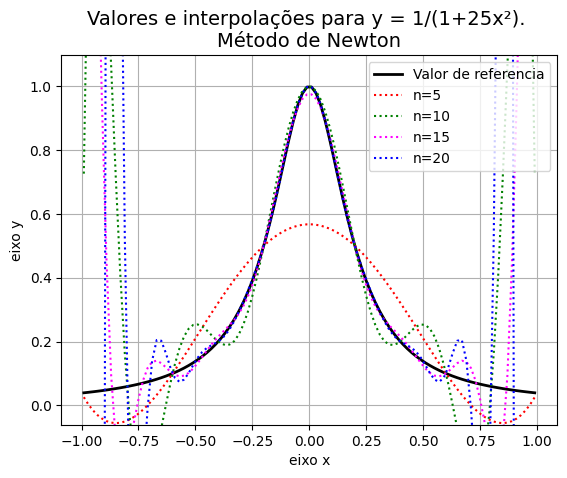

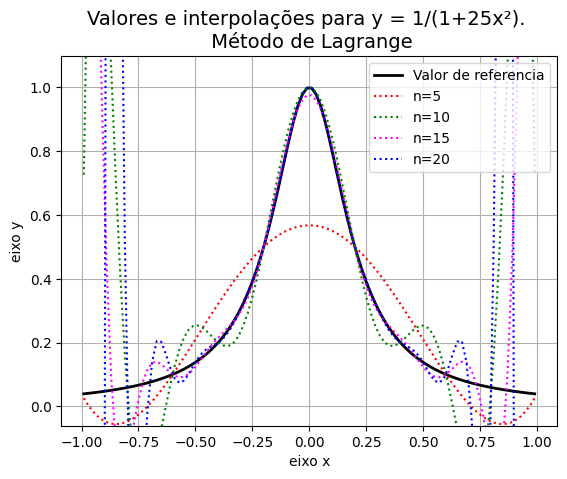

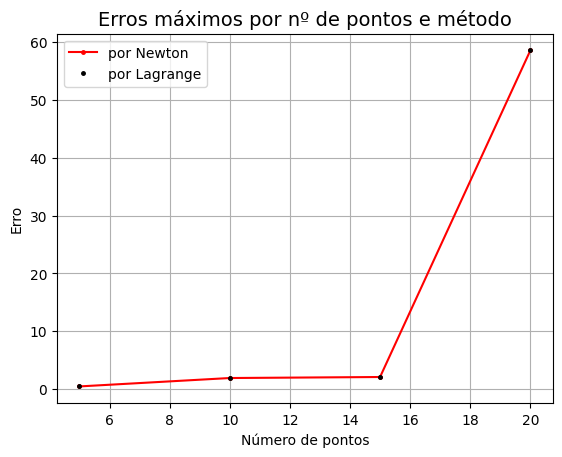



Item b) 
Refazendo as interpolações usando nós de Chebyshev:




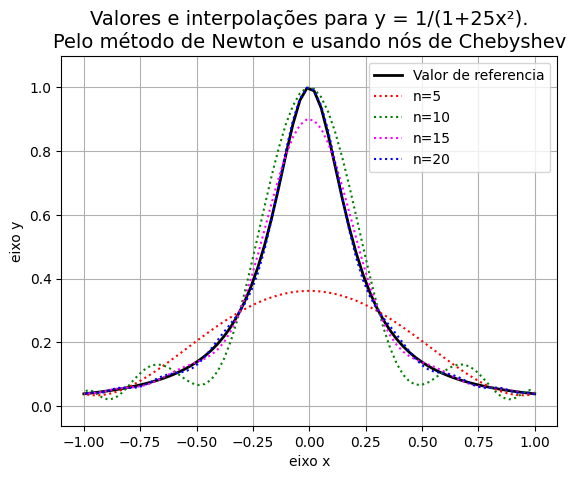

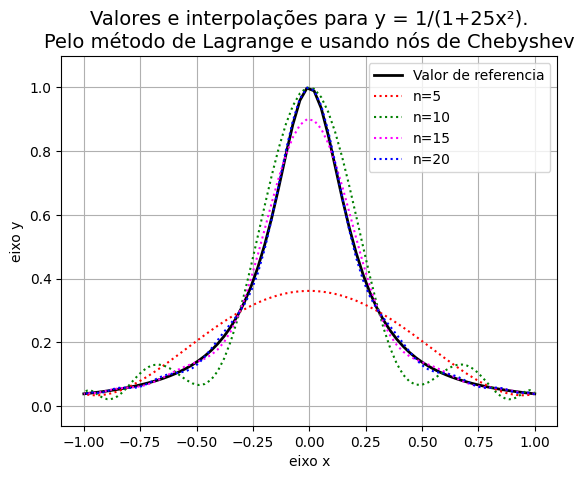

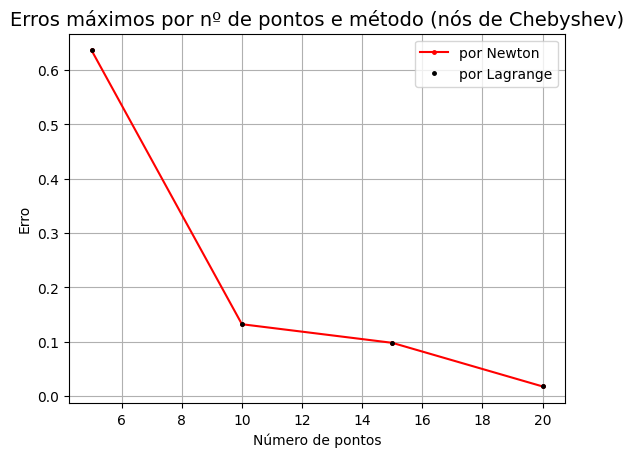



Vemos que o limite do erro com nós de Chebyshev é proximo de 1!


In [ ]:
import matplotlib.pyplot as plt
import math
import numpy
#interpolacao de lagrange
def lagrange_interpolation(valor_x,lista_x,lista_y):
    num_termos = len(lista_x)
    resultado = 0
    for i in range(num_termos): #somatorio
        termo = 1
        for j in range(num_termos):  #produtorio
            if(j!=i):
                termo *= ((valor_x - lista_x[j])/(lista_x[i] - lista_x[j]))
        termo *= lista_y[i] #multiplicando por y_i

        resultado+=termo

    return resultado

#calculo de diferencas divididas
def diferencas_divididas(lista_x,lista_y):
    if len(lista_x)!=len(lista_y):
        print("Coloque duas listas com mesmo tamanho.")
        return false

    n = len(lista_x)
    difdiv = []  #guardará tabela de diferenças divididas

    #Começando tabela de diferenças divididas de ordem 0
    difdiv.append([i for i in lista_y])

    for i in range(1,n):
        dif_ordem_n = [] #guardará diferenças divididas de ordem i para i<n
        for j in range(n-i):    #calcula os (n-i) termos de ordem i
            termo = (difdiv[i-1][j+1] - difdiv[i-1][j]) / (lista_x[j+i] - lista_x[j])  #calcula termo f[x_j, ... , x_j+i]
            dif_ordem_n.append(termo)
        difdiv.append(dif_ordem_n)

    return difdiv

#interpolacao de newton
def newton_interpolation(valor_x,lista_x,lista_y):
    num_termos = len(lista_x)
    dif_div = diferencas_divididas(lista_x,lista_y)

    if(type(valor_x)==type([])):  #caso seja lista a interpolar
        t = []
        for x in valor_x:
            t.append(0)
            for i in range(num_termos-1,0,-1):
                t[-1] += dif_div[i][0]
                t[-1] *= (x - lista_x[i-1])
            t[-1] += dif_div[0][0]
    else:  #caso seja só um valor a interpolar
        t = 0
        for i in range(num_termos-1,0,-1):
            t += dif_div[i][0]
            t *= (valor_x - lista_x[i-1])
        t += dif_div[0][0]
    return t


#funcao que calcula erro maximo dado a lista de valores referencia e valores teste
def calc_max_error(y_correct,y_test):
    error = []
    for i in range(len(y_test)):
        temp_error_list = [ math.fabs(y_correct[j] - y_test[i][j]) for j in range(len(y_correct))  ]
        error.append(max(temp_error_list))
    return error



# ITEM A)

n_list = [5,10,15,20]
x_list = []
y_list = []

i=0
#criar lista com 4 listas, cada uma com os pontos a serem utilizados:
for n in n_list:
    x_list.append( [(-1 + (2*j)/n) for j in range (n+1)] )
    #obtendo y para a lista de pontos criados:
    y_list.append( [ 1/(1 + (25*(x**2)) ) for x in x_list[i]] )
    i+=1


#obtendo lista de pontos de teste:
x_test = [ (-1 + (2*i + 1)/100) for i in range(100)]
#obtendo listas de f(x) para x nos pontos teste
y_control = [ 1/(1 + (25*(x**2)) ) for x in x_test ]

y_newton = []  #guardará 4 listas para interpolacoes com polinomios de diferentes graus
y_lagrange = []
for i in range(4):
    y_newton.append( newton_interpolation(x_test,x_list[i],y_list[i]) )
    y_lagrange.append ([lagrange_interpolation(val,x_list[i],y_list[i]) for val in x_test ])


#calculanr erro maximo para cada ponto, dada as 4 listas

max_error_newton = calc_max_error(y_control,y_newton)
max_error_lagrange = calc_max_error(y_control,y_lagrange)
print("ITEM A) \n")

#plotando grafico para metodo de newton
plt.plot(x_test,y_control,"k",label="Valor de referencia",lw=2)

plt.plot(x_test,y_newton[0],"r",label="n=5",linestyle='dotted')
plt.plot(x_test,y_newton[1],"g",label="n=10",linestyle='dotted')
plt.plot(x_test,y_newton[2],"magenta",label="n=15",linestyle='dotted')
plt.plot(x_test,y_newton[3],"b",label="n=20",linestyle='dotted')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.ylim([min(y_control)-0.1,max(y_control)+0.1])
plt.grid()
plt.title(u"Valores e interpolações para y = 1/(1+25x²). \nMétodo de Newton",fontsize=14)
plt.legend(fontsize=10)
plt.show()
print('\n')



#plotando grafico para metodo de lagrange
plt.plot(x_test,y_control,"k",label="Valor de referencia",lw=2)

plt.plot(x_test,y_lagrange[0],"r",label="n=5",linestyle='dotted')
plt.plot(x_test,y_lagrange[1],"g",label="n=10",linestyle='dotted')
plt.plot(x_test,y_lagrange[2],"magenta",label="n=15",linestyle='dotted')
plt.plot(x_test,y_lagrange[3],"b",label="n=20",linestyle='dotted')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.ylim([min(y_control)-0.1,max(y_control)+0.1])
plt.grid()
plt.title(u"Valores e interpolações para y = 1/(1+25x²). \n Método de Lagrange",fontsize=14)
plt.legend(fontsize=10)
plt.show()
print('\n')


#plotando grafico de erro
plt.title(u"Erros máximos por nº de pontos e método",fontsize=14)

plt.plot(n_list,max_error_newton,"-ro",label="por Newton",markersize=2.5)
plt.plot(n_list,max_error_lagrange,"ko",label="por Lagrange",markersize=2.5)

plt.xlabel('Número de pontos')
plt.ylabel('Erro')
plt.grid()
# plt.ylim([-1,200])
plt.legend(fontsize=10)
plt.show()
print('\n')

#ITEM B:


print("Item b) \nRefazendo as interpolações usando nós de Chebyshev:\n\n")
n_list = [5,10,15,20]
cheb_points = []
y_list = []

i=0
for n in n_list:
    #determinando pontos de chebyshev
    cheb_points.append( [math.cos( (j*math.pi)/ n) for j in range(n+1)] )

    #obtendo y para a lista de pontos criados:
    y_list.append( [ 1/(1 + (25*(x**2)) ) for x in cheb_points[i]] )
    i+=1

#obtendo lista de pontos de teste:
x_test = [ math.cos((i*math.pi + 1)/100) for i in range(100)]
y_control = [ 1/(1 + (25*(x**2)) ) for x in x_test ]

#cada lista guardará 4 listas com interpolacoes com polinomios de diferentes graus
y_newton = []
y_lagrange = []
for i in range(4):
    y_newton.append( newton_interpolation(x_test,cheb_points[i],y_list[i]))
    y_lagrange.append( [lagrange_interpolation(val,cheb_points[i],y_list[i]) for val in x_test ])


#plotando para metodo de newton

plt.plot(x_test,y_control,"k",label="Valor de referencia",lw=2)

plt.plot(x_test,y_newton[0],"r",label="n=5",linestyle='dotted')
plt.plot(x_test,y_newton[1],"g",label="n=10",linestyle='dotted')
plt.plot(x_test,y_newton[2],"magenta",label="n=15",linestyle='dotted')
plt.plot(x_test,y_newton[3],"b",label="n=20",linestyle='dotted')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.ylim([min(y_control)-0.1,max(y_control)+0.1])
plt.grid()
plt.title(u"Valores e interpolações para y = 1/(1+25x²).\nPelo método de Newton e usando nós de Chebyshev",fontsize=14)
plt.legend(fontsize=10)
plt.show()
print('\n')

#plotando para método de lagrange

plt.plot(x_test,y_control,"k",label="Valor de referencia",lw=2)

plt.plot(x_test,y_lagrange[0],"r",label="n=5",linestyle='dotted')
plt.plot(x_test,y_lagrange[1],"g",label="n=10",linestyle='dotted')
plt.plot(x_test,y_lagrange[2],"magenta",label="n=15",linestyle='dotted')
plt.plot(x_test,y_lagrange[3],"b",label="n=20",linestyle='dotted')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.ylim([min(y_control)-0.1,max(y_control)+0.1])
plt.grid()
plt.title(u"Valores e interpolações para y = 1/(1+25x²).\nPelo método de Lagrange e usando nós de Chebyshev",fontsize=14)
plt.legend(fontsize=10)
plt.show()
print('\n')

#calculando e plotando erros

max_error_newton = calc_max_error(y_control,y_newton)
max_error_lagrange = calc_max_error(y_control,y_lagrange)

#plotando grafico de erro
plt.title(u"Erros máximos por nº de pontos e método (nós de Chebyshev)",fontsize=14)

plt.plot(n_list,max_error_newton,"-ro",label="por Newton",markersize=2.5)
plt.plot(n_list,max_error_lagrange,"ko",label="por Lagrange",markersize=2.5)

plt.xlabel('Número de pontos')
plt.ylabel('Erro')
plt.grid()
plt.legend(fontsize=10)
plt.show()
print('\n')

print("Vemos que o limite do erro com nós de Chebyshev é proximo de 1!")

##Tarefa #3: Aplicação

A seguinte tabela de dados corresponde às medições de temperatura em diferentes pontos de uma placa.

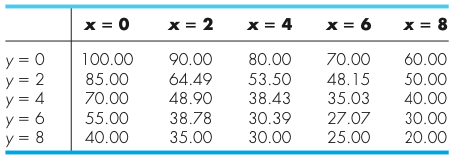


a) Estime o valor da temperatura no ponto $x=4$, $y=3.2$, usando interpolação

i) linear;
ii) quadrática;
iii) cúbica.

b) Explique suas escolhas e compare os valores estimados obtidos nos diferentes casos.

c) **Desafio**: Estime o valor da temperatura no ponto $x=4.5$, $y=2.7$, usando interpolação quadrática nas duas variáveis. Explique.


	Aproximação Linear usando pontos y = [2,4]:
Método de Lagrange : 44.4580000000
Método de Newton: 44.4580000000
	Aproximação Quadrática usando pontos y = [2,4,6]:
Método de Lagrange : 43.6144000000
Método de Newton: 43.6144000000
	Aproximação Cúbica usando pontos y = [0,2,4,6]:
Método de Lagrange : 43.3680000000
Método de Newton: 43.3680000000

Os pontos a serem usados foram pensados de forma que o ponto y=3.2 a ser interpolado fosse o mais próximo possível do centro do intervalo,
evitando assim as oscilações que ocorrem nas extremidades do polinômio interpolador. 


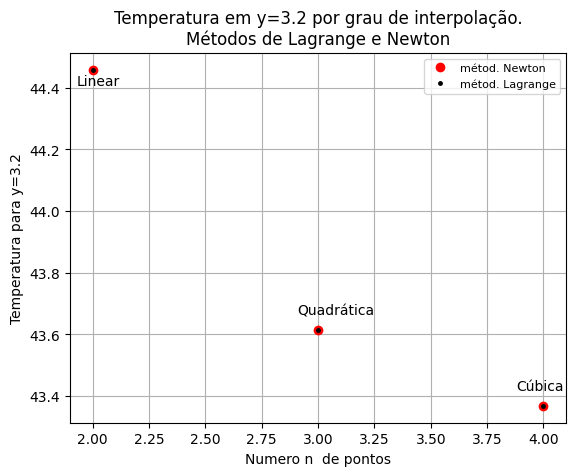

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy

#interpolacao de lagrange
def lagrange_interpolation(valor_x,lista_x,lista_y):
    num_termos = len(lista_x)
    resultado = 0
    for i in range(num_termos): #somatorio
        termo = 1
        for j in range(num_termos):  #produtorio
            if(j!=i):
                termo *= ((valor_x - lista_x[j])/(lista_x[i] - lista_x[j]))
        termo *= lista_y[i] #multiplicando por y_i

        resultado+=termo

    return resultado

#calculo de diferencas divididas
def diferencas_divididas(lista_x,lista_y):
    if len(lista_x)!=len(lista_y):
        print("Coloque duas listas com mesmo tamanho.")
        return false

    n = len(lista_x)
    difdiv = []  #guardará tabela de diferenças divididas

    #Começando tabela de diferenças divididas de ordem 0
    difdiv.append([i for i in lista_y])

    for i in range(1,n):
        dif_ordem_n = [] #guardará diferenças divididas de ordem i para i<n
        for j in range(n-i):    #calcula os (n-i) termos de ordem i
            termo = (difdiv[i-1][j+1] - difdiv[i-1][j]) / (lista_x[j+i] - lista_x[j])  #calcula termo f[x_j, ... , x_j+i]
            dif_ordem_n.append(termo)
        difdiv.append(dif_ordem_n)

    return difdiv

#interpolacao de newton
def newton_interpolation(valor_x,lista_x,lista_y):
    num_termos = len(lista_x)
    dif_div = diferencas_divididas(lista_x,lista_y)

    if(type(valor_x)==type([])):  #caso seja lista a interpolar
        t = []
        for x in valor_x:
            t.append(0)
            for i in range(num_termos-1,0,-1):
                t[-1] += dif_div[i][0]
                t[-1] *= (x - lista_x[i-1])
            t[-1] += dif_div[0][0]
    else:  #caso seja só um valor a interpolar
        t = 0
        for i in range(num_termos-1,0,-1):
            t += dif_div[i][0]
            t *= (valor_x - lista_x[i-1])
        t += dif_div[0][0]
    return t


#TAREFA 3 ITEM A)

#criando lista de entrada (valores da tabela)
x_4 = [80,53.5,38.43,30.39,30]
y = [0,2,4,6,8]
## interpolação linear usando pontos y = [2,4]
intpol_lagrange = []
intpol_newton = []
intpol_lagrange.append(lagrange_interpolation(3.2,y[1:3],x_4[1:3]))
intpol_newton.append(newton_interpolation(3.2,y[1:3],x_4[1:3]))

##interpolacao quadratica usando y=[2,4,6]
intpol_lagrange.append(lagrange_interpolation(3.2,y[1:4],x_4[1:4]))
intpol_newton.append(newton_interpolation(3.2,y[1:4],x_4[1:4]))

##interpolacao cubica usando y=[0,2,4,6]

intpol_lagrange.append(lagrange_interpolation(3.2,y[0:4],x_4[0:4]))
intpol_newton.append(newton_interpolation(3.2,y[0:4],x_4[0:4]))

for i in range(3):
    match i:
        case 0:
            print("\tAproximação Linear usando pontos y = [2,4]:\n" +
            "Método de Lagrange : {:.10f}\nMétodo de Newton: {:.10f}"
            .format(intpol_lagrange[i],intpol_newton[i]))
        case 1:
            print("\tAproximação Quadrática usando pontos y = [2,4,6]:\n" +
            "Método de Lagrange : {:.10f}\nMétodo de Newton: {:.10f}"
            .format(intpol_lagrange[i],intpol_newton[i]))
        case 2:
            print("\tAproximação Cúbica usando pontos y = [0,2,4,6]:\n" +
            "Método de Lagrange : {:.10f}\nMétodo de Newton: {:.10f}"
            .format(intpol_lagrange[i],intpol_newton[i]))

#plotando grafico
plt.title(u"Temperatura em y=3.2 por grau de interpolação.\nMétodos de Lagrange e Newton")
plt.plot([2,3,4],intpol_newton,"ro",label="métod. Newton")
plt.plot([2,3,4],intpol_lagrange,"ko",markersize=2.5,label="métod. Lagrange")
plt.xlabel("Numero " + u'n ' + " de pontos" )
plt.ylabel("Temperatura para y=3.2")
plt.grid()
plt.annotate("Linear",[1.93,intpol_lagrange[0]-0.05])
plt.annotate("Quadrática",[2.91,intpol_lagrange[1]+0.05])
plt.annotate("Cúbica",[3.88,intpol_lagrange[2]+0.05])

print("\nOs pontos a serem usados foram pensados de forma que o ponto y=3.2 a ser interpolado fosse o mais próximo possível do centro do intervalo,\n"+
        "evitando assim as oscilações que ocorrem nas extremidades do polinômio interpolador. ")
plt.legend(fontsize=8)
plt.show()

## Relatório
Inclua um relatório, na parte final do notebook, com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.
##Tarefa 1
Na tarefa 1 implementa-se as duas funções a serem usadas no resto do trabalho:

- A interpolação de Lagrange recebe, além dos valores x e y de referência, um valor de x a interpolar.

- A interpolação de Newton calcula a tabela de diferenças divididas ( por uma função a parte) e usa para calcular os valores para uma lista de valores x a interpolar, ou somente um valor, dependendo do argumento enviado ( uma lista ou um valor de x).

A função usada para testar as interpolação é a função f(x) = x^2. Utilizando-se 50 pontos de referência igualmente espaçados entre x = -50 e x = 50.

Um pequeno conjunto com mais pontos (para melhor visualização no gráfico) é calculado, mas o utilizado para a interpolação é o de 50 pontos.

Os pontos a serem interpolados são os do conjunto original somados de 0,53.
Por fim, observamos aproximações decentes.





##Tarefa 2
###Item a
Inicialmente calcula=se 4 listas de valores para x e y, com os diferentes números de pontos para a função dada (5, 10, 15 ou 20 pontos).

Após a obtenção da lista de pontos onde seriam calculadas as interpolações, obtém-se uma lista de valores usando a função descrita, para o posterior cálculo dos erros.

Para as interpolações são usadas as duas funções que implementaram o método de Newton e Lagrange, com 4 conjuntos de entrada contendo diferentes numeros de pontos (5,10,15,20).

Com o gráfico e o cálculo do erro máximo, podemos perceber a tendência de oscilações elevadas nas extremidades dos intervalos a interpolar. O erro máximo para um polinômio de grau 20 chega a passar de 4000.

###Item b

Anàlogamente à tarefa (a), é cálculado 4 interpolações para 100 pontos, cada uma com diferente número de pontos de entrada (5, 10, 15 e 20).

Vemos que o erro absoluto máximo para as interpolações se mantém abaixo de 1.1


Os pontos de Chebyshev (usados como entrada) são uma melhor distribuição dos pontos que atenuam as oscilações do fenômeno de Runge, por isso a diferença nos erros máximos para os conjuntos de pontos.


##Tarefa 3

Note que nesta questão queremos x em função de y.

A aproximação linear, quadrática e cúbica para a temperatura em x=4 y=3.2 foi considerada usando os respectivos conjuntos de pontos:

- y= [2,4]
- y=[2,4,6]
- y=[0,2,4,6]

Estes conjuntos foram pensados de forma que o ponto 3.2 fosse o mais próximo possível do centro do intervalo, evitando oscilações que acontecem nas extremidades do polinômio interpolador.

